In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as im
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns #For visualization purpose
from sklearn.metrics import classification_report,confusion_matrix #For model evaluation metrics
from sklearn.model_selection import train_test_split # For Spliting data to training and testing data
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('breast_cancer\wdbc.data',delimiter = ',',header=None)

# Drop column related to patient ID
data.drop(data.columns[0], axis=1, inplace=True)

# Select target column and saving it
targets = data.iloc[:, 0]
targets = targets.map({'M': 0, 'B': 1})

# Drop target column from training set
data.drop(data.columns[0], axis=1, inplace=True)

# Split data to training and testing data
X_train, X_test, y_train, y_test = train_test_split(data,targets,test_size=0.25,random_state=101)

# Scale data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Check correct dimensions of data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

--2024-12-13 19:43:51--  https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘wdbc.data’

wdbc.data               [ <=>                ] 121.19K  --.-KB/s    in 0.07s   

2024-12-13 19:43:52 (1.77 MB/s) - ‘wdbc.data’ saved [124103]

(426, 30)
(143, 30)
(426,)
(143,)


In [7]:
# Build neural network architecture
model = Sequential()
model.add(Dense(16, activation='sigmoid', input_dim=data.shape[1]))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

optim = tf.keras.optimizers.Adam()
es = EarlyStopping(patience=10, restore_best_weights=True)
model.compile(optimizer=optim, loss='binary_crossentropy',metrics=['accuracy'])

# Set fixed seed for reproducibility
np.random.seed(1)

In [8]:
# Train the model
hist = model.fit(X_train,y_train, validation_split=0.2, epochs=500, batch_size=10, callbacks=[es])

Epoch 1/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1811 - loss: 0.7532 - val_accuracy: 0.6047 - val_loss: 0.7060
Epoch 2/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6286 - loss: 0.6807 - val_accuracy: 0.6047 - val_loss: 0.6366
Epoch 3/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6169 - loss: 0.6155 - val_accuracy: 0.6279 - val_loss: 0.5739
Epoch 4/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7025 - loss: 0.5384 - val_accuracy: 0.7326 - val_loss: 0.5198
Epoch 5/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7375 - loss: 0.5168 - val_accuracy: 0.8140 - val_loss: 0.4704
Epoch 6/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8682 - loss: 0.4596 - val_accuracy: 0.8837 - val_loss: 0.4231
Epoch 7/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9065 - loss: 0.4200 - val_accuracy: 0.9302 - val_loss: 0.3805
Epoch 8/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9067 - loss: 0.3727 - val_accuracy: 0.9419 - v

In [9]:
# Print summary data
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 16)                  │             496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,925 (7.52 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,284 (5.02 KB)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9874 - loss: 0.0630 
Train score: [0.04369477555155754, 0.9906103014945984]
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9735 - loss: 0.0666 
Test score: [0.0654878318309784, 0.9790209531784058]
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


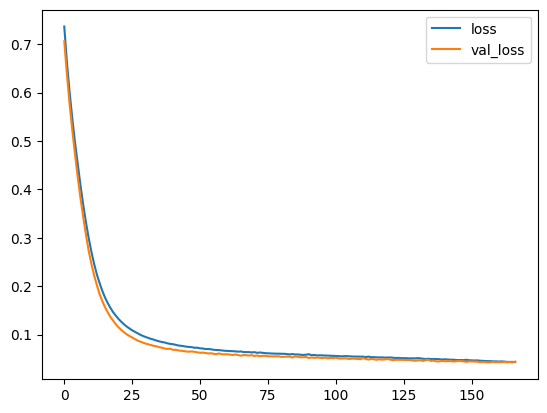

Confusion matrix: 
 [[54  1]
 [ 2 86]]


In [10]:
print("Train score:", model.evaluate(X_train, y_train)) # Evaluate returns loss and accuracy on train set
print("Test score:", model.evaluate(X_test, y_test)) # Evaluate returns loss and accuracy on test set

# Predict the target values for the test set
yPred = model.predict(X_test)
y_pred = (yPred > 0.5).astype(int)

plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n", cm)

